## Imports

In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import mysql.connector
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
import joblib
import datetime
%matplotlib qt

In [2]:
with open('../config.env') as f:
    credentials=f.read()
credentials=credentials.split(" ")
con = mysql.connector.connect(username=credentials[0],password=credentials[1],host=credentials[2],port=credentials[3],database=credentials[4])
query=con.cursor()



In [3]:
sql="SELECT * FROM total_india_cases"
query.execute(sql)
result=query.fetchall()
column=[columns[0] for columns in query.description]

In [4]:
data=pandas.DataFrame(result,columns=column)

In [5]:
data

,index_no,date,ordinal_date,total_confirmed,total_active,total_recovered,total_deaths,total_tested,total_vaccinated1,total_vaccinated2,...,delta7_confirmed,delta7_active,delta7_recovered,delta7_deaths,delta7_tested,delta7_vaccinated1,delta7_vaccinated2,total_other,delta_other,delta7_other
0,1,2020-01-30,737454,1,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1,2,2020-02-02,737457,2,2,0,0,0,0,0,...,2,2,0,0,0,0,0,0,0,0
2,3,2020-02-03,737458,3,3,0,0,0,0,0,...,3,3,0,0,0,0,0,0,0,0
3,4,2020-02-14,737469,3,0,3,0,0,0,0,...,0,-3,3,0,0,0,0,0,0,0
4,5,2020-03-02,737486,5,2,3,0,0,0,0,...,2,2,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,575,2021-09-23,738056,33593513,293402,32840724,446399,559932709,622902393,218615633,...,212978,-39045,249839,2121,10703560,40295488,28796794,12988,13,63
575,576,2021-09-24,738057,33623078,294619,32868773,446690,561661383,627174874,221754286,...,207189,-39055,244055,2127,10881110,31083028,22537043,12996,8,62
576,577,2021-09-25,738058,33651247,296493,32894794,446949,563243245,630831085,225250442,...,204228,-28342,230424,2080,10903077,29784635,21924561,13011,15,66
577,578,2021-09-26,738059,33678246,293584,32924419,447225,564408251,633216286,226942725,...,200399,-18559,216832,2060,10786485,29549513,22041354,13018,7,66


In [6]:
# data.info()

In [7]:
# data.describe()

In [8]:
# data.plot(kind='line',x='date',y='total_confirmed',figsize=(20,15))

In [9]:
# data.plot(kind='line',x='date',y='total_active',figsize=(20,15))

In [10]:
# data.plot(kind='line',x='date',y='delta_active',figsize=(20,15))

In [11]:
# data.plot(kind='line',x='date',y=['total_confirmed','total_active','total_tested'],figsize=(20,15))

In [12]:
# data.plot(kind='line',x='date',y=['delta_confirmed','delta_active','delta_tested'],figsize=(20,15))

In [13]:
# data.plot(kind='line',x='date',y=['delta7_confirmed','delta7_active','delta7_tested'],figsize=(20,15))

In [14]:
# data.corr()

In [15]:
def splitting(data,training_ratio):
    length=len(data)
    traing_indexes=int(length*training_ratio)
    training_set=data[:traing_indexes]
    testing_set=data[traing_indexes:]
    return training_set,testing_set

In [16]:
# training_data,testing_data=splitting(data,0.9)

In [17]:
# len(training_data)

In [18]:
# len(testing_data)

In [19]:
# training_data.value_counts()

In [20]:
# testing_data.value_counts()

In [21]:
# features_data=training_data[['ordinal_date']]

In [22]:
# features_data

In [23]:
# labels=training_data['total_confirmed']

In [24]:
# labels

In [25]:
# features=features_data.to_numpy()

In [26]:
# features

# model implementation

In [27]:
# model=LinearRegression()

In [28]:
# model.fit(features,labels)

In [29]:
# model.predict([[737987]])

In [30]:
# train_predicted=model.predict(features)

In [31]:
# test_features=testing_data[['ordinal_date']].to_numpy()

In [32]:
# test_labels=testing_data['total_confirmed']

In [33]:
# test_predicted=model.predict(test_features)

In [34]:
# train_predicted

In [35]:
# test_predicted

In [36]:
# plt.plot(predicted,test_features)

In [37]:
# plt.plot(test_features,predicted)

## Evaluation

In [38]:
# mean_squared_error_evaluation=mean_squared_error(test_labels,test_predicted)
# mean_absolute_error_evaluation=mean_absolute_error(test_labels,test_predicted)

In [39]:
# mean_squared_error_evaluation

In [40]:
# numpy.sqrt(mean_squared_error_evaluation)

In [41]:
# mean_absolute_error_evaluation

In [42]:
def returnNext7days():
    date=738044
    date_range=[]
    l=[]
    for i in range(1,8):
        l.append([date+i])
        date_range.append(datetime.date.fromordinal(date+i))
    return l,date_range
predictingdate,daterange=returnNext7days()
print(predictingdate)
print(daterange)

[[738045], [738046], [738047], [738048], [738049], [738050], [738051]]
[datetime.date(2021, 9, 12), datetime.date(2021, 9, 13), datetime.date(2021, 9, 14), datetime.date(2021, 9, 15), datetime.date(2021, 9, 16), datetime.date(2021, 9, 17), datetime.date(2021, 9, 18)]


In [43]:
# next7days_predicted=model.predict(predictingdate)

In [44]:
# next7days_predicted

## forcasting the results for next 7 days

In [45]:
# plt.plot(data['date'],numpy.concatenate((train_predicted,test_predicted)),label='Line of Regression')
# plt.plot(data['date'],numpy.concatenate((labels,test_labels)),label='Acual Data')
# plt.plot(daterange,next7days_predicted)
# plt.legend()
# plt.show()

# New Model Try

In [46]:
data

,index_no,date,ordinal_date,total_confirmed,total_active,total_recovered,total_deaths,total_tested,total_vaccinated1,total_vaccinated2,...,delta7_confirmed,delta7_active,delta7_recovered,delta7_deaths,delta7_tested,delta7_vaccinated1,delta7_vaccinated2,total_other,delta_other,delta7_other
0,1,2020-01-30,737454,1,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1,2,2020-02-02,737457,2,2,0,0,0,0,0,...,2,2,0,0,0,0,0,0,0,0
2,3,2020-02-03,737458,3,3,0,0,0,0,0,...,3,3,0,0,0,0,0,0,0,0
3,4,2020-02-14,737469,3,0,3,0,0,0,0,...,0,-3,3,0,0,0,0,0,0,0
4,5,2020-03-02,737486,5,2,3,0,0,0,0,...,2,2,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,575,2021-09-23,738056,33593513,293402,32840724,446399,559932709,622902393,218615633,...,212978,-39045,249839,2121,10703560,40295488,28796794,12988,13,63
575,576,2021-09-24,738057,33623078,294619,32868773,446690,561661383,627174874,221754286,...,207189,-39055,244055,2127,10881110,31083028,22537043,12996,8,62
576,577,2021-09-25,738058,33651247,296493,32894794,446949,563243245,630831085,225250442,...,204228,-28342,230424,2080,10903077,29784635,21924561,13011,15,66
577,578,2021-09-26,738059,33678246,293584,32924419,447225,564408251,633216286,226942725,...,200399,-18559,216832,2060,10786485,29549513,22041354,13018,7,66


In [47]:
data.plot(kind='scatter',x='date',y=['delta_confirmed'],figsize=(20,15))

<AxesSubplot:xlabel='date', ylabel='[delta_confirmed]'>

In [48]:
data.plot(kind='line',x='date',y=['delta_confirmed'],figsize=(20,15))

<AxesSubplot:xlabel='date'>

In [49]:
# data.plot(kind='bar',x='date',y=['delta_confirmed','delta_recovered'],figsize=(20,15))

In [50]:
# data.plot(kind='line',x='date',y=['delta_confirmed'],figsize=(20,15))

In [51]:
# data.plot(kind='line',x='date',y=['delta_confirmed','delta_vaccinated1'],figsize=(20,15))

In [52]:
# data.plot(kind='line',x='date',y=['delta_confirmed','delta_vaccinated1','delta_tested'],figsize=(20,15))

In [53]:
data.plot(kind='line',x='date',y=['delta_confirmed','delta_vaccinated1','delta_tested','delta_vaccinated2'],figsize=(20,15))

<AxesSubplot:xlabel='date'>

In [54]:
# data=data[100:]

### model training and testing

<h2>RandomForestRegressor</h2>

In [55]:
training_data,testing_data=splitting(data,0.90)

In [56]:
training_fetures=training_data[['ordinal_date','delta_vaccinated1','delta_tested']].to_numpy()

In [57]:
training_labels=training_data['delta_confirmed']

In [58]:
testing_fetures=testing_data[['ordinal_date','delta_vaccinated1','delta_tested']].to_numpy()

In [59]:
testing_labels=testing_data['delta_confirmed']

In [60]:
# testing_labels

In [61]:
randomforest_model=RandomForestRegressor()

In [62]:
randomforest_model.fit(training_fetures,training_labels)

RandomForestRegressor()

In [63]:
training_prediction=randomforest_model.predict(training_fetures)

In [64]:
# training_prediction

In [65]:
testing_prediction=randomforest_model.predict(testing_fetures)

In [66]:
# testing_prediction

In [67]:
mean_absolute_error(training_labels,training_prediction)

1496.7694625719766

In [68]:
mean_absolute_error(testing_labels,testing_prediction)

7318.233103448276

In [69]:
plt.plot(training_data['date'],training_labels)
plt.plot(training_data['date'],training_prediction)
plt.plot(testing_data['date'],testing_prediction)

## Forcasting Model Implementation

### ARIMA model try

In [74]:
pandas.to_datetime(data['date'])

0     2020-01-30
1     2020-02-02
2     2020-02-03
3     2020-02-14
4     2020-03-02
         ...    
574   2021-09-23
575   2021-09-24
576   2021-09-25
577   2021-09-26
578   2021-09-27
Name: date, Length: 579, dtype: datetime64[ns]

In [70]:
from statsmodels.tsa.arima.model import ARIMA

In [71]:
# arima_model_data=pandas.DataFrame(data[[]])

In [396]:
arima_model_data=data[['ordinal_date','delta_confirmed','delta_tested']]

In [403]:
arima_model_data_train

,delta_confirmed,delta_tested
ordinal_date,,
737454,1,0
737457,1,0
737458,1,0
737469,0,0
737486,2,0
...,...,...
738027,46129,1944831
738028,44550,1824931
738029,46806,1933293


In [398]:
arima_model_data

,ordinal_date,delta_confirmed,delta_tested
0,737454,1,0
1,737457,1,0
2,737458,1,0
3,737469,0,0
4,737486,2,0
...,...,...,...
574,738056,31411,1565696
575,738057,29565,1728674
576,738058,28169,1581862
577,738059,26999,1165006


In [399]:
arima_model_data=arima_model_data.set_index('ordinal_date')

In [400]:
arima_model_data

,delta_confirmed,delta_tested
ordinal_date,,
737454,1,0
737457,1,0
737458,1,0
737469,0,0
737486,2,0
...,...,...
738056,31411,1565696
738057,29565,1728674
738058,28169,1581862


In [401]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

In [402]:
arima_model_data_train=arima_model_data[:550]

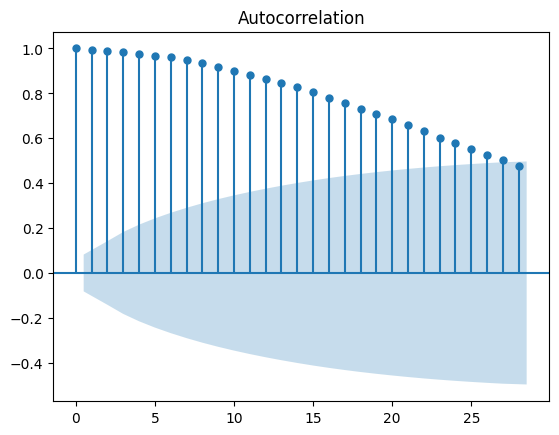

In [355]:
plot_acf(arima_model_data_train)

C:\Users\Pankaj singh\AppData\Roaming\Python\Python39\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


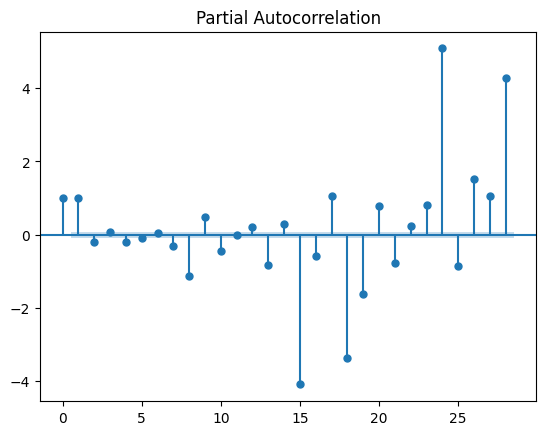

In [356]:
plot_pacf(arima_model_data_train)

In [357]:
model = ARIMA(arima_model_data_train,order=(5,0,3))

C:\Users\Pankaj singh\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Pankaj singh\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Pankaj singh\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [358]:
arima_fit_model=model.fit()

C:\Users\Pankaj singh\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Pankaj singh\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [359]:
arima_fit_model

In [360]:
arima_fit_model.aic

11786.458142161593

In [361]:
arima_fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        delta_confirmed   No. Observations:                  570
Model:                 ARIMA(5, 0, 3)   Log Likelihood               -5883.229
Date:                Wed, 29 Sep 2021   AIC                          11786.458
Time:                        12:27:16   BIC                          11829.915
Sample:                             0   HQIC                         11803.413
                                - 570                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.868e+04   3.48e+04      1.688      0.091   -9442.031    1.27e+05
ar.L1          0.1093      0.043      2.534      0.011       0.025       0.194
ar.L2          0.1049      0.043      2.434      0.015       0.020       0.189
ar.L3          0.4291      0.035     12.292      0.000       0.361       0.497
ar.L4          0.6577      0.051     12.883      0.000       0.558       0.758
ar.L5         -0.3217      0.021    -15.042      0.000      -0.364      -0.280
ma.L1          1.0846      0.038     28.650      0.000       1.010       1.159
ma.L2          1.0742      0.013     83.911      0.000       1.049       1.099
ma.L3          0.8633      0.034     25.109      0.000       0.796       0.931
sigma2      2.352e+07    233.008   1.01e+05      0.000    2.35e+07    2.35e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):              1402.44
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):              19.82   Skew:                             0.70
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.66e+20. Standard errors may be unstable.
"""

In [366]:
arima_model_forcast=arima_fit_model.forecast(steps=9)

C:\Users\Pankaj singh\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [367]:
arima_model_forcast

570    28588.279319
571    21986.820749
572    24784.416571
573    27598.895863
574    25054.514768
575    22747.955833
576    27400.269221
577    27525.977482
578    24459.299338
Name: predicted_mean, dtype: float64

In [368]:
mean_absolute_error(arima_model_data[570:],arima_model_forcast)

4016.236055146877

In [404]:
var_model_data=arima_model_data

In [405]:
var_model_data

,delta_confirmed,delta_tested
ordinal_date,,
737454,1,0
737457,1,0
737458,1,0
737469,0,0
737486,2,0
...,...,...
738056,31411,1565696
738057,29565,1728674
738058,28169,1581862


In [406]:
var_model_data_train=var_model_data[:550]

In [407]:
var_model_data_train

,delta_confirmed,delta_tested
ordinal_date,,
737454,1,0
737457,1,0
737458,1,0
737469,0,0
737486,2,0
...,...,...
738027,46129,1944831
738028,44550,1824931
738029,46806,1933293


In [408]:
from statsmodels.tsa.vector_ar.var_model import VAR


In [412]:
var_model=VAR(var_model_data_train)

C:\Users\Pankaj singh\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [413]:
var_model_fit=var_model.fit()

In [414]:
var_model_fit.forecast(var_model.y,steps=29)

<ipython-input-414-8c051d3cf4d7>:1: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  var_model_fit.forecast(var_model.y,steps=29)


array([[  43209.7609591 , 1464129.53560773],
       [  43065.65449171, 1427216.54784586],
       [  42940.35571272, 1392694.82648874],
       [  42832.62400856, 1360412.45125382],
       [  42741.29769077, 1330227.13912181],
       [  42665.28898878, 1302005.63305525],
       [  42603.57936029, 1275623.12948964],
       [  42555.21509905, 1250962.74213793],
       [  42519.3032213 , 1227914.99980491],
       [  42495.00761311, 1206377.37605456],
       [  42481.54542206, 1186253.84870976],
       [  42478.18367787, 1167454.48729221],
       [  42484.2361273 , 1149895.06663044],
       [  42499.06026989, 1133496.70497598],
       [  42522.05458166, 1118185.52507328],
       [  42552.65591492, 1103892.3367274 ],
       [  42590.33706308, 1090552.33950597],
       [  42634.60447984, 1078104.84429823],
       [  42684.99614308, 1066493.01253521],
       [  42741.07955428, 1055663.6119507 ],
       [  42802.44986476, 1045566.78783398],
       [  42868.72812092, 1036155.84879159],
       [  

In [350]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [384]:
sarima_model=SARIMAX(arima_model_data)

C:\Users\Pankaj singh\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Pankaj singh\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [385]:
sarima_model_fit=sarima_model.fit()

In [386]:
sarima_model_forcast=sarima_model_fit.forecast()

C:\Users\Pankaj singh\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [387]:
# mean_absolute_error(arima_model_data[575:],sarima_model_forcast)

In [388]:
arima_model_data[575:]

,delta_confirmed
ordinal_date,
738057,29565
738058,28169
738059,26999
738060,14907


In [390]:
sarima_model_forcast

579    14845.808971
dtype: float64